In [1]:
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np
import random

In [3]:
# let's create a linear function with some error called f
def f(x):
    res = x* 25 + 3
    error = res * random.uniform(-0.12, 0.12) # you can play with the error to see how it affects the result
    return res + error

In [4]:
values = []
# now using f we are going to create 300 values.
for i in range(0, 100):
    x = random.uniform(1, 1000)
    y = f(x)
    values.append((x, y))
    regr = linear_model.LinearRegression()
# split the values into two series instead a list of tuples
x, y = zip(*values)
print(x)
print(y)
max_x = max(x)
min_x = min(x)

(791.6308666973629, 122.35027431868367, 780.9552646694738, 239.27528928826604, 284.7398881281116, 601.9179664070853, 87.33258044098565, 543.5596534915392, 10.869523503822112, 535.4956581002319, 306.984234409933, 494.70639124465464, 101.08117325054994, 418.696520598794, 714.0825301864861, 236.86428014295035, 499.66781045236274, 920.2605557377533, 953.578797800901, 268.36856325306985, 283.6441966160436, 883.6891720626681, 216.6277777177196, 831.9796428317054, 267.37215286758385, 632.2123016799294, 536.1050512772152, 651.3682780288882, 670.1895460146288, 38.93553521489309, 721.533442216647, 973.6958063043548, 672.1929788130853, 200.47747932671098, 410.6323128104162, 363.8355783907478, 435.37574871388875, 921.0749613088299, 510.5074388870972, 984.6877798510227, 995.2634450061635, 563.0569192817111, 889.305418490758, 399.89845725874056, 126.30552943854946, 460.4758296892479, 389.4254316391145, 992.0733401081915, 686.0313204926796, 580.8852280399681, 302.61970920775696, 645.8728032619498, 77

In [5]:
# split the values in training and test data.
#x_val=np.array(x[:-20])
#train_data_X=np.matrix(x_val.reshape(len(x_val),1))
train_data_X = list(map(lambda x: [x], list(x[:-20])))
train_data_Y = list(y[:-20])
#x_val=np.array(x[-20:])
#test_data_X=np.matrix(x_val.reshape(len(x_val),1))
test_data_X = list(map(lambda x: [x], list(x[-20:])))
test_data_Y = list(y[-20:])

In [6]:
# feed the linear regression with the train data to obtain a model.
regr.fit(train_data_X, train_data_Y)
# check that the coeffients are the expected ones.
m = regr.coef_[0]
b = regr.intercept_
print(' y = {0} * x + {1}'.format(m, b))

 y = 24.903434484951635 * x + 204.29735318830535


Text(0, 0.5, 'y')

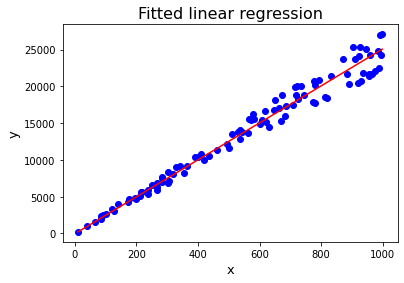

In [7]:
# now we are going to plot the points and the model obtained
plt.scatter(x, y, color='blue')  # you can use test_data_X and test_data_Y instead.
plt.plot([min_x, max_x], [b, m*max_x + b], 'r')
plt.title('Fitted linear regression', fontsize=16)
plt.xlabel('x', fontsize=13)
plt.ylabel('y', fontsize=13)

In [8]:
# The mean squared error
print("Mean squared error: %.2f" % np.mean((regr.predict(test_data_X) - test_data_Y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(test_data_X, test_data_Y))

Mean squared error: 1168006.81
Variance score: 0.98
